In [1]:
import pandas as pd
import requests
import csv

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
symbol = 'AVAUSDT'
tick_interval = '1d'

In [3]:
def get_candles(start='', symbol='ETHUSDT', tick_interval='1d', limit=1000):
    
    base_url = 'https://api.binance.com/'
    endpoint = 'api/v3/klines?'
    
    if start:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&startTime=' + str(start) +'&limit='+str(limit)
    else:
        query = 'symbol=' + symbol + '&interval=' + tick_interval +'&limit='+str(limit)
        
    candles = requests.get(base_url + endpoint + query).json()
    
    return candles, candles[-1][6]

In [4]:
def get_all_candles_from_start(symbol, tick_interval):  # devuelve una lista de velas, cada vela es una lista tb
    
    start=1502942400000  # 17 de agosto de 2017
    _, last_time = get_candles(start='', symbol=symbol , tick_interval=tick_interval, limit=1)
    
    candles = []
    while start < last_time:
        i_candles, next_hop = get_candles(start, symbol, tick_interval)
        candles = candles + i_candles
        start = next_hop
        
    return candles

In [5]:
candles = get_all_candles_from_start(symbol, tick_interval)
columns=['open_time','open', 'high', 'low','close','volume','close_time','quote','trades',
         'takers_buy_base','takers_buy_quote','ignore']
ava = pd.DataFrame(candles, columns=columns)

In [6]:
ava = ava.sort_values('close_time')
ava.drop_duplicates(keep='last')
ava = ava.astype(float)
ava.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 472
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open_time         473 non-null    float64
 1   open              473 non-null    float64
 2   high              473 non-null    float64
 3   low               473 non-null    float64
 4   close             473 non-null    float64
 5   volume            473 non-null    float64
 6   close_time        473 non-null    float64
 7   quote             473 non-null    float64
 8   trades            473 non-null    float64
 9   takers_buy_base   473 non-null    float64
 10  takers_buy_quote  473 non-null    float64
 11  ignore            473 non-null    float64
dtypes: float64(12)
memory usage: 48.0 KB


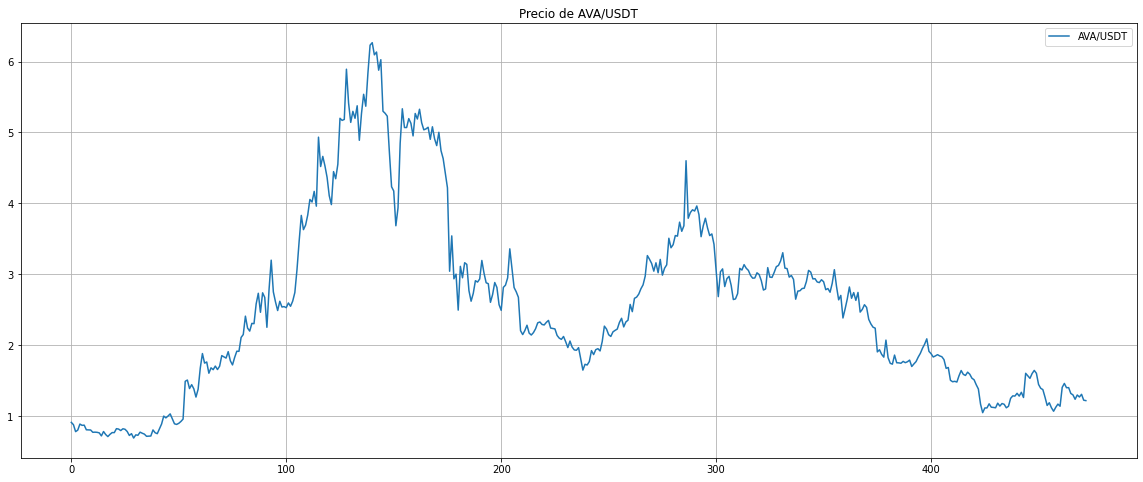

In [7]:
ava['close'].plot(figsize=(20,8), label='AVA/USDT')
plt.title('Precio de AVA/USDT')
plt.legend()
plt.grid()

In [8]:
ava['close_time'] = pd.to_datetime(ava['close_time'], unit='ms')
ava['close_time'] = ava['close_time'].dt.tz_localize('utc').dt.tz_convert('Europe/Madrid')
ava = ava.set_index('close_time')

In [9]:
ava.drop('ignore', axis=1, inplace=True)

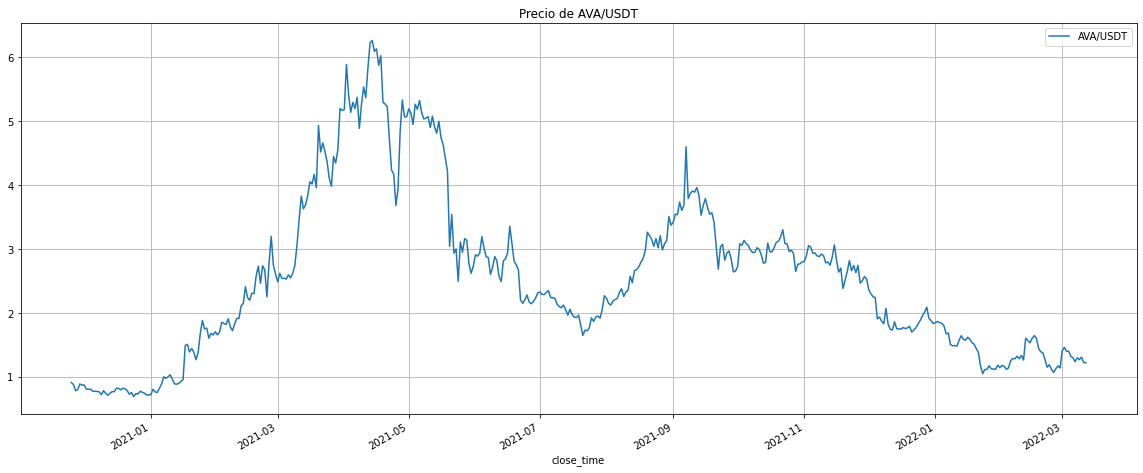

In [10]:
ava['close'].plot(figsize=(20,8), label='AVA/USDT')
plt.title('Precio de AVA/USDT')
plt.legend()
plt.grid()